# Einen Autoencoder auf Fashion-MNIST Bilder "einschleifen"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model



# 1. Fashion-MNIST Datensatz vorbereiten
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 2. Autoencoder-Modell in Keras erstellen
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)], name="Encoder")

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')], name = "Decoder")

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
h = autoencoder.fit(x_train, x_train,
                    epochs=20,
                    shuffle=True,
                    validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0124 - val_loss: 0.0048
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss:

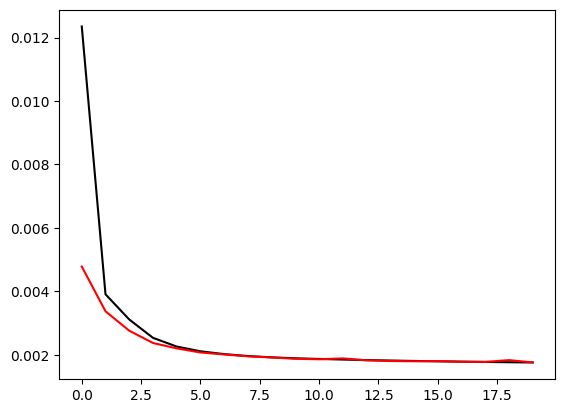

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h.history["loss"], color="black")
plt.plot(h.history["val_loss"], color="red")
plt.show()

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Sequential)        (None, 7, 7, 8)           1320      
                                                                 
 Decoder (Sequential)        (None, 28, 28, 1)         1897      
                                                                 
Total params: 3217 (12.57 KB)
Trainable params: 3217 (12.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Einen Schwellwert für die Klassifikation normales vs. anomales Bild festlegen

1875/1875 [==============================] - 4s 2ms/step


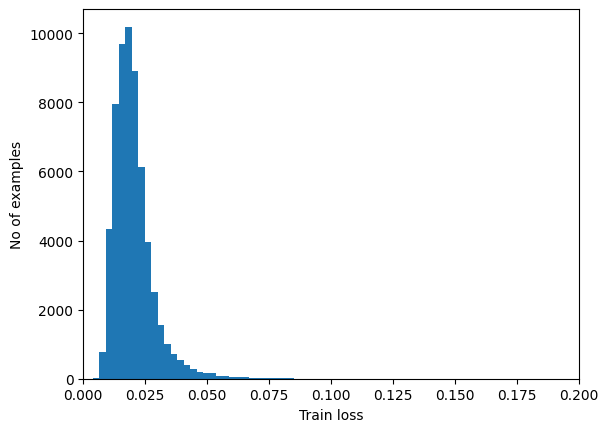

threshold (mean+stddev):  0.028691836


In [ ]:
# 3. Einen Schwellwert festlegen, um normale und anomale
#    Bilder zu unterscheiden
def get_mean_max_and_stddev_of_reconstruction_error(model, data):
  reconstructions = model.predict(data)
  train_loss = tf.keras.losses.mae(reconstructions.squeeze(), data)
  train_loss = tf.reduce_mean(train_loss, axis=[1])
  histdata = plt.hist(train_loss.numpy(), bins=50)
  plt.xlabel("Train loss")
  plt.ylabel("No of examples")
  plt.xlim(0,0.2)
  plt.show()
  return np.mean(train_loss), np.max(train_loss), np.std(train_loss)

mean,maxvalue,stddev = get_mean_max_and_stddev_of_reconstruction_error(autoencoder,
                                                                       x_train)
threshold = mean + stddev
print("threshold (mean+stddev): ", threshold)

In [ ]:
histdata

(array([4.500e+01, 6.200e+02, 2.805e+03, 7.123e+03, 9.437e+03, 9.627e+03,
        8.962e+03, 7.354e+03, 5.078e+03, 3.213e+03, 1.890e+03, 1.213e+03,
        7.720e+02, 5.050e+02, 3.660e+02, 2.540e+02, 1.660e+02, 1.470e+02,
        1.010e+02, 7.300e+01, 5.800e+01, 4.600e+01, 4.600e+01, 2.500e+01,
        1.300e+01, 1.800e+01, 8.000e+00, 6.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.00895832, 0.01196269, 0.01496707, 0.01797145, 0.02097583,
        0.0239802 , 0.02698458, 0.02998896, 0.03299334, 0.03599771,
        0.03900209, 0.04200647, 0.04501085, 0.04801523, 0.05101961,
        0.05402398, 0.05702836, 0.06003274, 0.06303711, 0.06604149,
        0.06904587, 0.07205024, 0.07505462, 0.078059  , 0.08106338,
        0.08406775, 0.08707213, 0.09

# Anomale Bilder erzeugen

In [ ]:
x_test_abnormal = x_test.copy()

variant = 3

if variant == 1:
  s = 22
  N = x_test_abnormal.shape[0]

  for i in range(N):
    x,y = np.random.randint(low=0, high=28-s, size=2)
    x_test_abnormal[i,y:y+s,x:x+s] = 0

elif variant == 2:

  noise_factor = 0.2
  x_test_abnormal = x_test_abnormal + noise_factor * tf.random.normal(shape=x_test_abnormal.shape)
  x_test_abnormal = tf.clip_by_value(x_test_abnormal, clip_value_min=0., clip_value_max=1.)

elif variant == 3:

  s = 10
  N = x_test_abnormal.shape[0]

  noise_factor = 0.3

  for i in range(N):
    x,y = np.random.randint(low=0, high=28-s, size=2)
    x_test_abnormal[i,y:y+s,x:x+s] += noise_factor * tf.random.normal(shape=(s,s))

  x_test_abnormal = tf.clip_by_value(x_test_abnormal, clip_value_min=0., clip_value_max=1.)

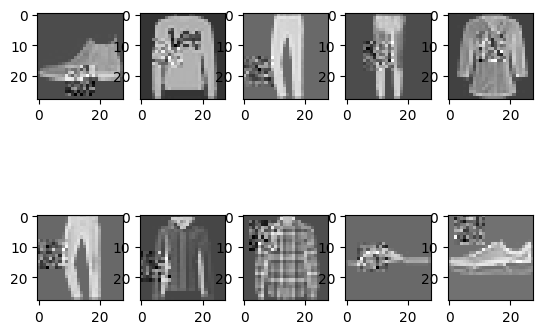

In [ ]:
import matplotlib.pyplot as plt


for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow( x_test_abnormal[i] )
plt.show()

# Histogramm der Rekonstruktionsfehler für abnormale Bilder

313/313 [==============================] - 1s 2ms/step


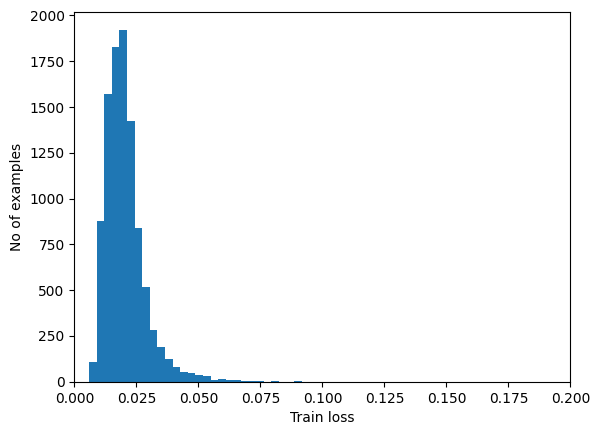

threshold mean:  0.020464513
313/313 [==============================] - 1s 2ms/step


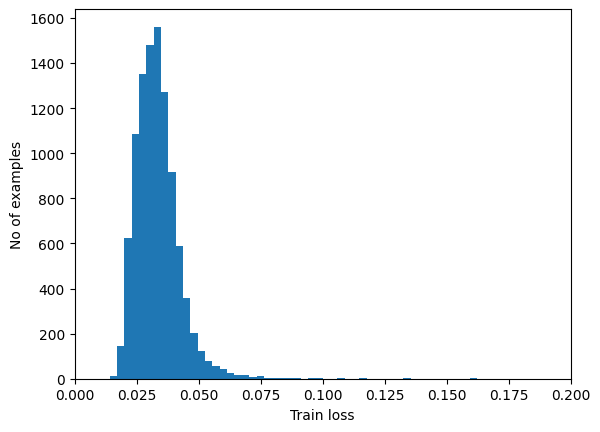

threshold_abnormal mean:  0.033408653


In [ ]:
mean,maxvalue1,stddev = get_mean_max_and_stddev_of_reconstruction_error(autoencoder,
                                                              x_test)
threshold = mean + stddev
print("threshold mean: ", mean)

mean,maxvalue2,stddev = get_mean_max_and_stddev_of_reconstruction_error(autoencoder,
                                                                        x_test_abnormal)

threshold_abnormal = mean + stddev
print("threshold_abnormal mean: ", mean)

# Testen des Anomalie-Detektors

In [ ]:
def predict(model, data, threshold):
  reconstructions = model.predict(data)

  loss = tf.keras.losses.mae(reconstructions.squeeze(), data)
  loss = tf.reduce_mean(loss, axis=[1])

  return tf.math.less(loss, threshold)

def print_stats(title, predictions, labels):
  print("{}: Accuracy = {}".format(title,
                                   accuracy_score(labels, predictions)))

# Modell mit normalen Bildern testen (normale Fashion-MNIST)
preds = predict(autoencoder, x_test, threshold)
x_test_labels = np.ones(x_test.shape[0])
print_stats("Normale Testbilder", preds, x_test_labels)


# Modell mit abnormalen Bildern testen (normale Fashion-MNIST + Artefakte)
preds = predict(autoencoder, x_test_abnormal, threshold)
x_test_abnormal_labels = np.zeros(x_test.shape[0])
print_stats("Abnormale Testbilder", preds, x_test_abnormal_labels)

313/313 [==============================] - 1s 2ms/step
Normale Testbilder: Accuracy = 0.8877
313/313 [==============================] - 1s 2ms/step
Abnormale Testbilder: Accuracy = 0.677


In [ ]:
x_test_abnormal_labels[:200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
preds.numpy().astype(int)[:200]

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1])

# Inspektion der rekonstruierten abnormalen Testbilder

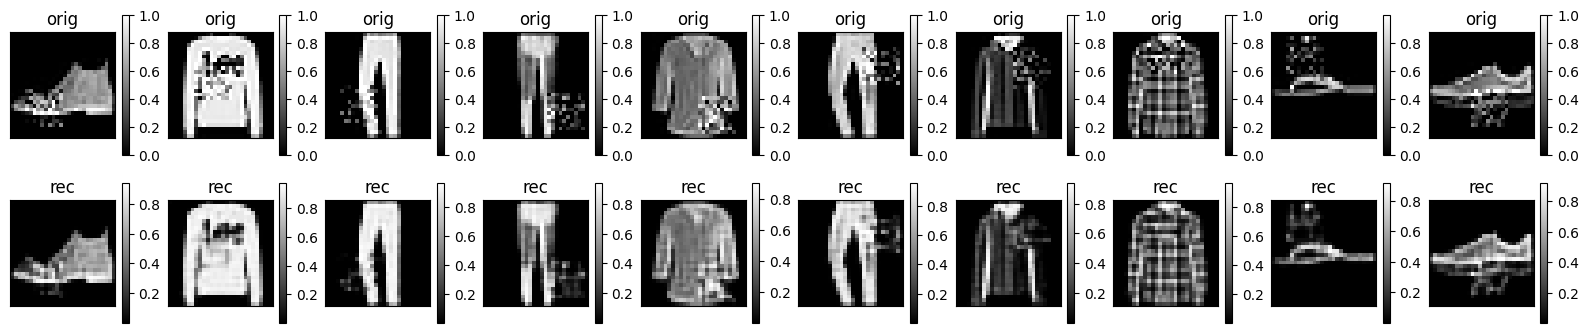

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_abnormal).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("orig")
    plt.imshow(tf.squeeze(x_test_abnormal[i]))
    plt.colorbar()
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("rec")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.colorbar()
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()